In [9]:
import pandas as pd
import glob
from ast import literal_eval
import matplotlib.pyplot as plt
plt.style.use('dark_background')
pd.options.display.max_colwidth = 100
import nltk
from nltk.corpus import stopwords

### Concat all files together 

In [10]:
all_files = glob.glob("headlines_pages/*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files))
df['date'] = pd.to_datetime(df['date']) # sets format of "date" column as datetime
df = df[df['headline'].notna()].drop_duplicates().sort_values(by='date') 
df['keywords'] = df['keywords'].apply(literal_eval)
df

['data/tesla-tweets.csv',
 'data/fullData.csv',
 'data/Tesla Weekly Price - Sheet1.csv',
 'data/Tesla 145 - Sheet1.csv',
 'data/news.csv']

In [3]:
start_date = pd.to_datetime('2022-04-10')
end_date = pd.to_datetime('2022-11-12')

df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

df

,headline,date,doc_type,material_type,section,keywords
8,Twitter Grapples With an Elon Musk Problem,2022-04-11,article,News,NaN,"[Social Media, Computers and the Internet, Stocks and Bonds, Shareholder Rights and Activism, Bo..."
7,Elon Musk Backs Out,2022-04-11,article,News,NaN,"[Social Media, Politics and Government, Philanthropy, High Net Worth Individuals, Mergers, Acqui..."
5,"Elon Musk Will Not Join Twitter’s Board, Company Says",2022-04-11,article,News,NaN,"[Social Media, Computers and the Internet, Boards of Directors]"
3,Truck Makers Face a Tech Dilemma: Batteries or Hydrogen?,2022-04-11,article,News,NaN,"[Batteries, Trucks and Trucking, Hydrogen, Electric and Hybrid Vehicles, Fuel Efficiency]"
4,More Companies Take a Stand on Abortion,2022-04-12,article,News,NaN,[Abortion]
...,...,...,...,...,...,...
5,Tough Lines on Ukraine and China: Seeing Policy Fallout From U.S. Election,2022-11-10,article,News,NaN,[Midterm Elections (2022)]
6,A Verifiable Mess: Twitter Users Create Havoc by Impersonating Brands,2022-11-11,article,News,NaN,"[Social Media, Rumors and Misinformation, Hoaxes and Pranks, Mergers, Acquisitions and Divestitu..."
7,Regulators Begin Cracking Down on FTX,2022-11-11,article,News,NaN,[]
0,Two Weeks of Chaos: Inside Elon Musk’s Takeover of Twitter,2022-11-11,article,News,NaN,"[Social Media, Online Advertising, Layoffs and Job Reductions, Computers and the Internet, Appoi..."


### Run sentiment analysis

In [4]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Instantiate the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Get the headline and keywords
    headline = row['headline']
    keywords = row['keywords']
    
    # Combine the headline and keywords into one string
    text = headline + ' ' + ' '.join(keywords)
    # Check if "s&p 500" is in the text
    if "tesla" not in text.lower():
        continue

    
    # Get the sentiment score for the text
    sentiment = sia.polarity_scores(text)['compound']
    # Add the sentiment score to the DataFrame
    df.at[index, 'sentiment'] = sentiment
# Add a new column to the DataFrame for the date of the article
df['article_date'] = pd.to_datetime(df['date']).dt.date

# Group the DataFrame by article date and aggregate the sentiment scores
sentiment_by_day = df.groupby('article_date')['sentiment'].mean()

df['week'] = pd.to_datetime(df['date']).dt.to_period('W')
sentiment_by_week = df.groupby('week')['sentiment'].mean()


df['month'] = pd.to_datetime(df['date']).dt.to_period('M')
sentiment_by_month = df.groupby('month')['sentiment'].mean()


sentiment_by_week.to_csv('news.csv', header=True)


/var/folders/mx/692lnb091_x0tgfw7r9dsl3m0000gn/T/ipykernel_21676/2392794917.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index, 'sentiment'] = sentiment
/var/folders/mx/692lnb091_x0tgfw7r9dsl3m0000gn/T/ipykernel_21676/2392794917.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['article_date'] = pd.to_datetime(df['date']).dt.date
/var/folders/mx/692lnb091_x0tgfw7r9dsl3m0000gn/T/ipykernel_21676/2392794917.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

### Sentiment by Day

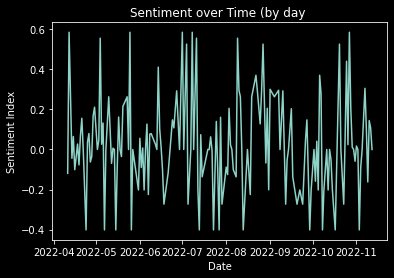

In [6]:
import matplotlib.pyplot as plt

plt.plot(sentiment_by_day.index, sentiment_by_day.values)
plt.xlabel('Date')
plt.ylabel('Sentiment Index')
plt.title('Sentiment over Time (by day ')
plt.show()


### Sentiment by Week

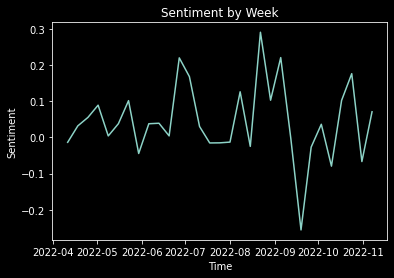

In [7]:
# plot sentiment by week with time as the x value
plt.plot(sentiment_by_week.index.to_timestamp(), sentiment_by_week.values)
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.title('Sentiment by Week')
plt.show()

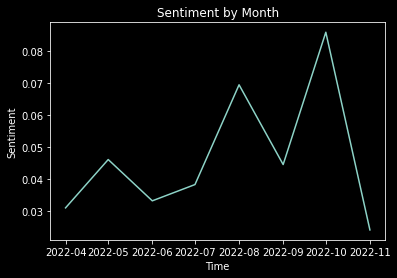

In [8]:
# plot sentiment by month with time as the x value
plt.plot(sentiment_by_month.index.to_timestamp(), sentiment_by_month.values)
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.title('Sentiment by Month')
plt.show()